# Unit 12 - Natural Language Processing ("Tales from the Crypto")
---


## 1. Sentiment Analysis

In [ ]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import datetime
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

from collections import Counter
from nltk import ngrams

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import spacy
from spacy import displacy

 
# !python -m spacy download en_core_web_sm # Download the language model for SpaCy

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
def get_article_sentiment(article):
	try:
		text = article["content"]
		date = article["publishedAt"][:10]
		sentiment = analyzer.polarity_scores(text)
		compound = sentiment["compound"]
		pos = sentiment["pos"]
		neu = sentiment["neu"]
		neg = sentiment["neg"]
		sentiment = {
			"text":text,
			"date":date,
			"compound":compound,
			"positive":pos,
			"neutral":neu,
			"negative":neg,
		}
	except AttributeError:
		pass
	return sentiment

In [3]:
def find_tokens(raw_text_array):
	lines = []
	for r in raw_text_array:
		line = r.casefold()
		tokens_a = word_tokenize(line)
		tokens_b = [t for t in tokens_a if t.isalnum()]
		tokens_c = [t for t in tokens_b if t not in s_words]
		tokens_d = [t for t in tokens_c if not t.isdigit()]
		lines.append(tokens_d)
		
	all_tokens = ""
	for l in lines:
		l_str = " ".join(l)
		all_tokens += l_str
		
	return all_tokens

In [4]:
load_dotenv()
api_key = os.getenv("NEWSAPI") # Read api key as environment variable

In [5]:
newsapi = NewsApiClient(api_key=api_key) # Create a newsapi client

In [6]:
btc_news = newsapi.get_everything(q="Bitcoin",language="en")
# btc_news
# btc_news["articles"][0] # Fetch the Bitcoin news articles

In [7]:
eth_news = newsapi.get_everything(q="Ethereum",language="en")
# eth_news
# eth_news["articles"][0] # Fetch the Ethereum news articles

In [8]:
btc_articles =  btc_news["articles"]
# btc_articles

In [9]:
btc_sentiments = [get_article_sentiment(article) for article in btc_articles]
# btc_sentiments

In [10]:
eth_articles =  eth_news["articles"]
# eth_articles

In [11]:
eth_sentiments = [get_article_sentiment(article) for article in eth_articles]
# eth_sentiments

In [12]:
btc_df = pd.DataFrame(btc_sentiments)
btc_df.set_index('date',inplace=True)
btc_df.index = pd.to_datetime(btc_df.index)
print("\nBitcoin Sentiment")
display(btc_df)


Bitcoin Sentiment


,text,compound,positive,neutral,negative
date,,,,,
2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.902,0.098
2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.923,0.000
2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.876,0.000
2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.836,0.000
2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.960,0.040
...,...,...,...,...,...
2022-06-13,"NEW YORK, June 13 (Reuters) - Binance U.S. and...",0.6597,0.141,0.859,0.000
2022-06-15,"SINGAPORE, June 15 (Reuters) - Cryptocurrency ...",0.2732,0.063,0.937,0.000
2022-06-25,We are excited to bring Transform 2022 back in...,0.8655,0.263,0.737,0.000


In [13]:
eth_df = pd.DataFrame(eth_sentiments)
eth_df.set_index('date',inplace=True)
eth_df.index = pd.to_datetime(eth_df.index)
print("\nEthereum Sentiment")
display(eth_df)


Ethereum Sentiment


,text,compound,positive,neutral,negative
date,,,,,
2022-06-24,"Sky Mavis, the developer of blockchain game Ax...",-0.7184,0.000,0.846,0.154
2022-06-23,"Jim Cramer, the CNBC host whos reportedly wort...",0.5106,0.107,0.893,0.000
2022-06-18,"The price of Ethereum has dropped below $1,250...",0.2732,0.063,0.937,0.000
2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.941,0.000
2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.866,0.000
...,...,...,...,...,...
2022-06-22,"Now known as ""The Merge"", the Ethereum (ETH) u...",0.5994,0.133,0.867,0.000
2022-05-31,What happened\r\nAfter stocks rebounded last w...,0.4404,0.142,0.789,0.069
2022-06-22,What happened\r\nMost cryptocurrencies fell to...,0.0772,0.038,0.962,0.000


In [14]:
btc_mean_pos = btc_df['positive'].mean()
eth_mean_pos = eth_df['positive'].mean()

btc_mean_neg =  btc_df['negative'].mean()
eth_mean_neg =  eth_df['negative'].mean()

btc_pos_max =  btc_df['positive'].max()
eth_pos_max =  eth_df['positive'].max()

btc_neg_max =  btc_df['negative'].max()
eth_neg_max =  eth_df['negative'].max()

In [15]:
print(f"(Date: {datetime.date.today()})")
print(f" • btc_mean_pos: {btc_mean_pos:.3f}")
print(f" • eth_mean_pos: {eth_mean_pos:.3f}")


print(f" • btc_mean_neg: {btc_mean_neg:.3f}")
print(f" • eth_mean_neg: {eth_mean_neg:.3f}")

print(f" • btc_pos_max:  {btc_pos_max:.3f}")
print(f" • eth_pos_max:  {eth_pos_max:.3f}")

print(f" • btc_neg_max:  {btc_neg_max:.3f}")
print(f" • eth_neg_max:  {eth_neg_max:.3f}")

(Date: 2022-06-27)
 • btc_mean_pos: 0.069
 • eth_mean_pos: 0.081
 • btc_mean_neg: 0.062
 • eth_mean_neg: 0.057
 • btc_pos_max:  0.269
 • eth_pos_max:  0.349
 • btc_neg_max:  0.372
 • eth_neg_max:  0.372


# *Sentiment Summary:*

**Highest mean positive score: Ethereum (0.081)** > btc_mean_pos (0.069)

**Highest mean negative score: Bitcoin (0.062)** > eth_mean_neg (0.057)

**Maximum positive sentiment: Ethereum (0.349)** > Bitcoin (0.269)

**Maximum negative sentiment: Tie (0.372)** (Possible logical error in API data)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, NLTK and Python are used to tokenize the text for each coin. Steps:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
s_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

# [placeholder for expanding stopwords]
words_to_add = [
	"even",
	"though",
	"chars",
	"reuters",
	'bitcoin',
	'ethereum',
	'closebitcoin',
	'previous', 
	'close',
]
for word in words_to_add:
	s_words.add(word) 
# s_words

In [17]:
btc_raw_text_array = btc_df.text.values
btc_tokens = find_tokens(btc_raw_text_array)
btc_token_list = btc_tokens.split(" ")
# btc_tokens

In [18]:
eth_raw_text_array = eth_df.text.values
eth_tokens = find_tokens(eth_raw_text_array)
eth_token_list = eth_tokens.split(" ")
# eth_tokens

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
btc_ngr = Counter(ngrams(btc_token_list, n=2))
eth_ngr = Counter(ngrams(eth_token_list, n=2))

In [20]:
btc_ngr.most_common(10) # get the top 10 word pairs for Bitcoin

[(('crypto', 'lender'), 7),
 (('el', 'salvador'), 5),
 (('celsius', 'network'), 5),
 (('new', 'york'), 4),
 (('world', 'biggest'), 4),
 (('dropped', 'gmt'), 4),
 (('lender', 'celsius'), 4),
 (('elon', 'musk'), 4),
 (('digital', 'currency'), 3),
 (('losing', 'world'), 3)]

In [21]:
eth_ngr.most_common(10) # get the top 10 word pairs for Ethereum

[(('cryptocurrency', 'market'), 5),
 (('crypto', 'winter'), 4),
 (('world', 'biggest'), 4),
 (('crypto', 'lender'), 4),
 (('dan', 'frommer'), 4),
 (('frommer', 'publication'), 4),
 (('publication', 'people'), 4),
 (('people', 'spend'), 4),
 (('spend', 'time'), 4),
 (('time', 'money'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

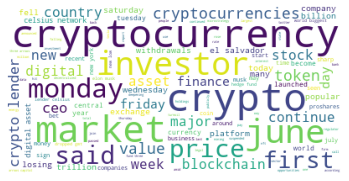

In [22]:
# Generate the Bitcoin word cloud
cloud_btc = WordCloud(background_color='white').generate(btc_tokens)
plt.axis("off")
plt.imshow(cloud_btc);

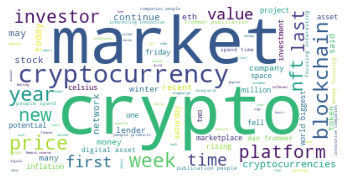

In [65]:
ax = plt.figure(figsize=(6,10))

# Generate the Ethereum word cloud
cloud_eth = WordCloud(background_color='white').generate(eth_tokens)
plt.axis("off")
eth_img = plt.imshow(cloud_eth);
# plt.savefig(eth_img)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp

---
### Bitcoin NER

In [25]:
# Concatenate all of the Bitcoin text together
btc_tokens

'new york lawmakers passed bill would temporarily ban new mining operations early friday state senators voted pass legislation bound deskrapper entrepreneur shawn carter better known bringing place grew thursday former twitter ceo jack dorsey announced launchnew study calls question whether digital currency truly decentralized anonymous biggest devotees would believe researchers baylor riceimage caption president touadéra wants rethink country economic philosophy central african republic decision adopt legal tender came surprisereportedly pay burritos tacos digital currencies case mind spending coins directly instead going exchanges first flexajoe tidycyber reporter cryptocurrencies continued tumble week billions wiped value tokens like crash affecting investors worldwide includingcnn el salvador embraced like country government purchasing hundreds coins last year announced cryptocurrency would become legal tenderstephen dubner freakonomics radio installment recommended listening freak

In [26]:
btc_doc = nlp(btc_tokens) # Run the NER processor on all of the text
btc_doc.user_data["Title"] = "Creative Title" # Add a title to the document
displacy.render(btc_doc,style="ent") # Render the visualization

In [28]:
# List all Entities
for element in btc_doc.ents:
    print(element.text, element.label_)

new york GPE
early friday DATE
thursday DATE
ceo jack dorsey PERSON
first ORDINAL
el salvador GPE
hundreds CARDINAL
last year DATE
paris GPE
day DATE
one CARDINAL
monday DATE
monday DATE
june DATE
tuesday DATE
microstrategy inc ORG
thursday DATE
saturday DATE
saturday DATE
earlier day DATE
today DATE
tokenjune ORG
today DATE
etf ORG
june DATE
wednesday DATE
sunday DATE
saturday DATE
monday DATE
billions CARDINAL
tuesday DATE
five CARDINAL
kellogg ORG
june DATE
digital ORG
robert cyran PERSON
el salvador GPE
monday DATE
american NORP
united states GPE
wednesday DATE
elon musk TIME
monday DATE
saturday DATE
winter DATE
el salvador GPE
american NORP
1tn ORDINAL
june DATE
wednesday DATE
joe biden PERSON
one CARDINAL
storieshong kong GPE
june DATE
tuesday DATE
el salvador GPE
tuesday DATE
half million CARDINAL
today DATE
california GPE
el salvador GPE
september DATE
cameron tyler ORG
muhammad shamim david weisz goutham PERSON
kevin kim PERSON
new york GPE
seelook day DATE
europe LOC
michael

---

### Ethereum NER

In [56]:
# eth_tokens # Concatenate all of the Ethereum text together

# Run the NER processor on all of the text

# Add a title to the document
eth_doc = nlp(eth_tokens) # Run the NER processor on all of the text
eth_doc.user_data["Title"] = "Ethereum NER" # Add a title to the document

# Render the visualization
eth_ner = displacy.render(eth_doc,style="ent")

In [32]:
# List all Entities
for element in eth_doc.ents:
    print(element.text, element.label_)

sky mavis PERSON
million CARDINAL
earlier year DATE
worth least million CARDINAL
brooklyn GPE
new england connecticut maine ORG
massachusetts GPE
today DATE
two CARDINAL
first ORDINAL
early friday DATE
ebay ORG
ebay ORG
today DATE
one CARDINAL
thursday DATE
saturday DATE
monday DATE
monday DATE
yudkowsky PERSON
elon musk TIME
sunday elon musk DATE
hours musk TIME
several years ago DATE
kim kardashian PERSON
nba ORG
third ORDINAL
wednesday DATE
new york GPE
gallon CARDINAL
hong crypto GPE
friday DATE
kristen CARDINAL
three CARDINAL
monday DATE
billions CARDINAL
hong babel GPE
friday DATE
sunday DATE
saturday DATE
biggestgeorge soros WORK_OF_ART
million CARDINAL
three CARDINAL
yearalgorand smart PERSON
july DATE
july DATE
today DATE
recent years DATE
earlierftx sam PERSON
million CARDINAL
crypto lender blockfi digital asset companies ORG
cameron tyler ORG
chevrolet ORG
web3 LOC
xsullo ORG
first ORDINAL
late saturday TIME
1tn ORDINAL
last two years DATE
gpu committedkitco news PERSON
dan 

---